
Aperçu des colonnes : Index(['prix', 'Taxes_municipales', 'Taxes_scolaires', 'Electricite',
       'Assurances', 'ville', 'region', 'adresse', 'chambres', 'salle_de_bain',
       'salle_d_eau', 'etage', 'Aire_habitable', 'Taille_du_terrain'],
      dtype='object')
               prix  Taxes_municipales  Taxes_scolaires   Electricite  \
count  1.035100e+04       1.035100e+04     1.035100e+04  1.035100e+04   
mean   1.758693e+06       3.063490e+05     3.469022e+04  1.820068e+05   
std    9.840292e+07       4.692883e+05     1.668644e+05  1.202259e+05   
min    1.000000e+00       1.000000e+02     1.000000e+00  1.000000e+00   
25%    2.999000e+05       2.244285e+05     2.234550e+04  1.698390e+05   
50%    4.459000e+05       2.699600e+05     2.758300e+04  1.700000e+05   
75%    6.499000e+05       3.234500e+05     3.420000e+04  1.728000e+05   
max    1.000000e+10       3.260000e+07     1.290570e+07  4.200000e+06   

         Assurances     chambres  salle_de_bain   salle_d_eau         etage 

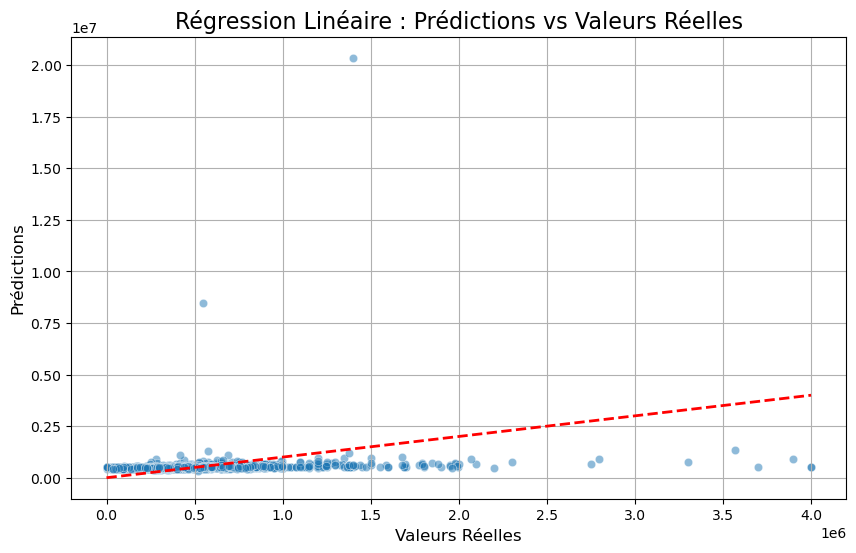

C:\Users\Khaled\Documents\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


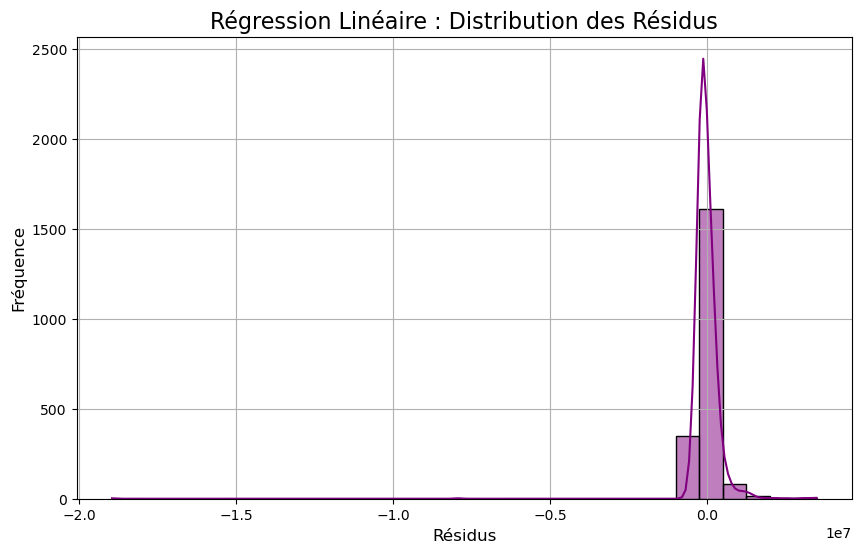

Modèle : RandomForestRegressor
MAE : 100,589.44
MSE : 49,539,702,373.54
RMSE : 222,575.16
R² : 0.6277
----------------------------------------


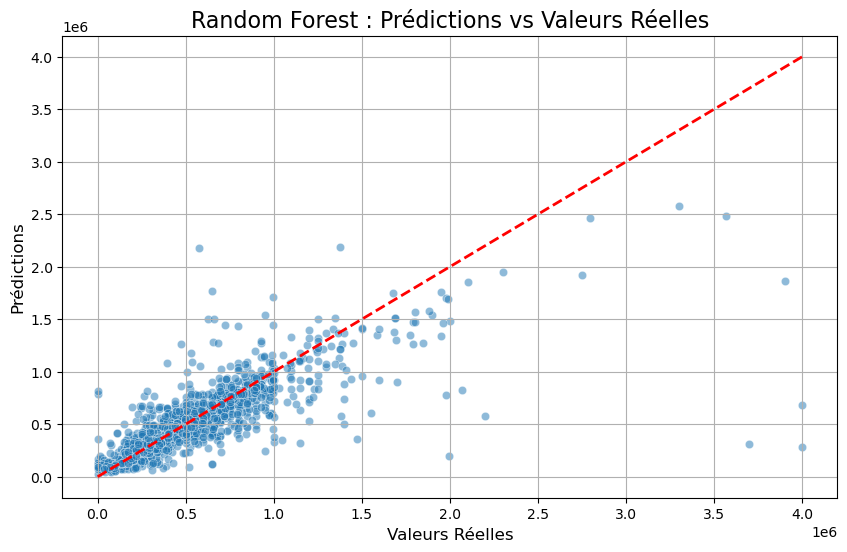

C:\Users\Khaled\Documents\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


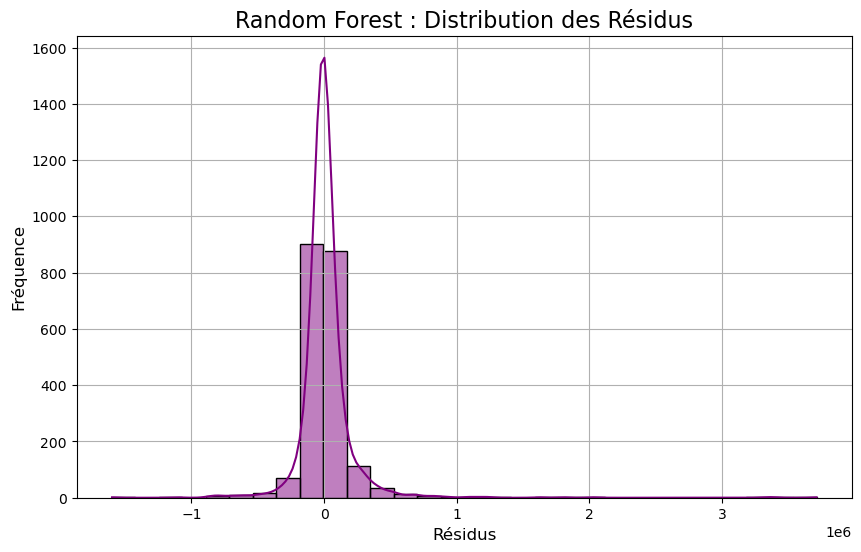

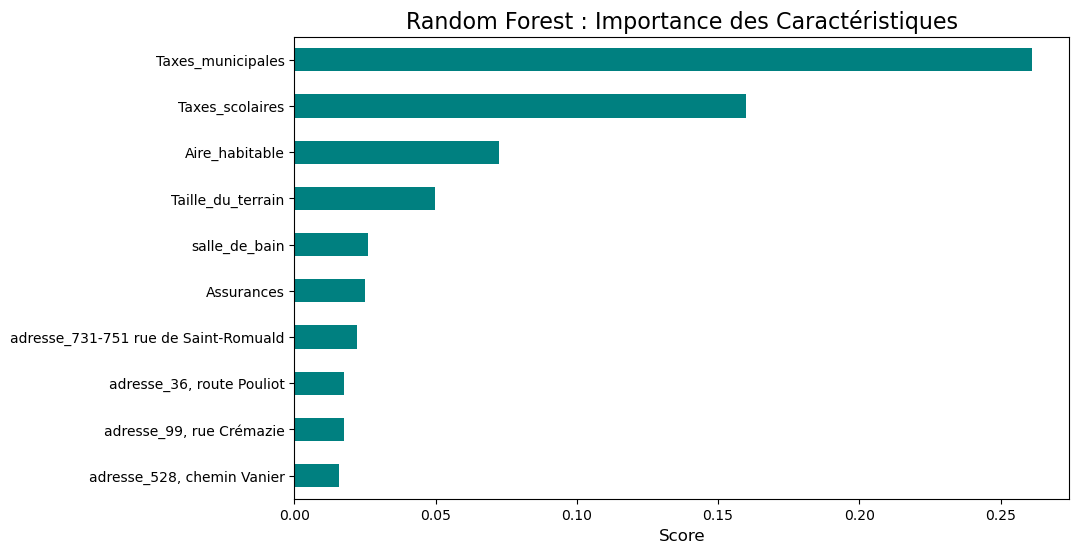

Modèle : XGBRegressor
MAE : 118,824.08
MSE : 52,222,624,941.93
RMSE : 228,522.70
R² : 0.6076
----------------------------------------


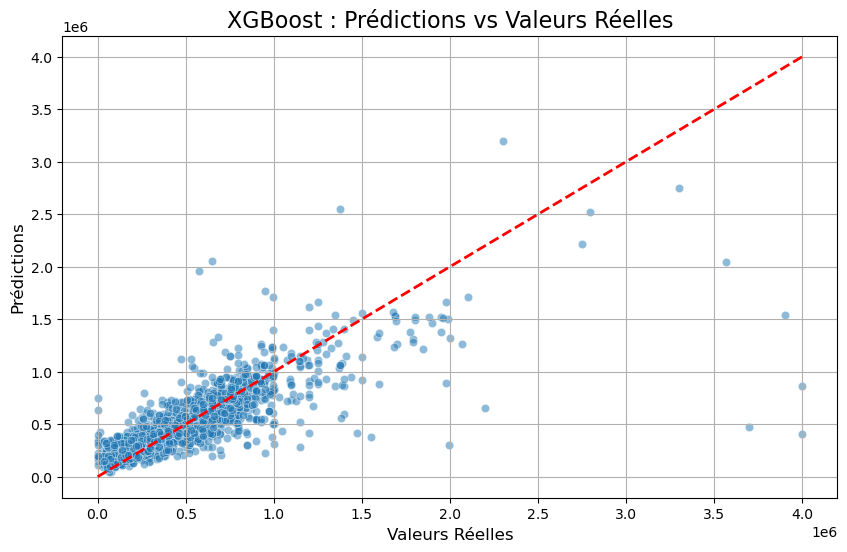

C:\Users\Khaled\Documents\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


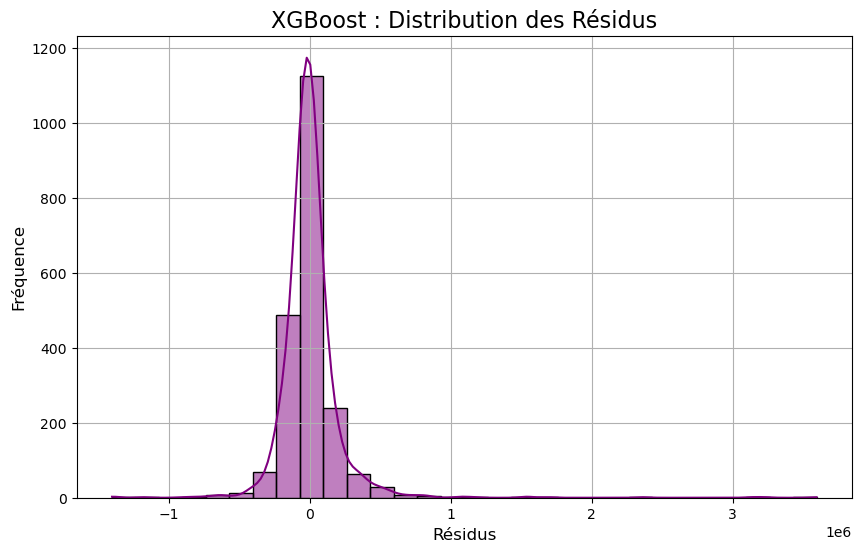

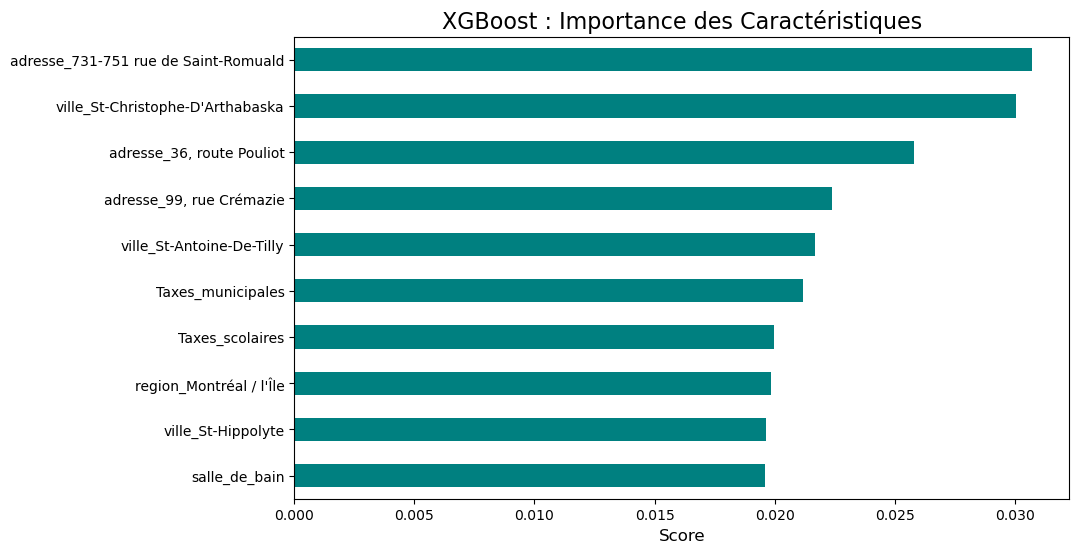

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Créer le dossier de sauvegarde si nécessaire
output_dir = '../reports/figures/'
os.makedirs(output_dir, exist_ok=True)

# Charger les données nettoyées
data = pd.read_csv('../data/data_processed/cleaned_quebec_house_price.csv')

# Vérification des colonnes non numériques et valeurs aberrantes
print("\nAperçu des colonnes :", data.columns)
print(data.describe())

# Supprimer les valeurs aberrantes basées sur 'prix' et 'Aire_habitable'
data = data[data['prix'] < 1e7]
data = data[data['Aire_habitable'] < 8000]

# Encodage des colonnes non numériques
non_numeric_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

# Préparer les données pour la modélisation
X = data.drop('prix', axis=1)
y = data['prix']

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluer_modele(modele, y_test, y_pred):
    print(f"Modèle : {type(modele).__name__}")
    print(f"MAE : {mean_absolute_error(y_test, y_pred):,.2f}")
    print(f"MSE : {mean_squared_error(y_test, y_pred):,.2f}")
    print(f"RMSE : {mean_squared_error(y_test, y_pred, squared=False):,.2f}")
    print(f"R² : {r2_score(y_test, y_pred):.4f}")
    print("-" * 40)

def plot_and_save(fig, filename):
    fig.savefig(os.path.join(output_dir, filename))
    plt.show()

def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title(f'{model_name} : Prédictions vs Valeurs Réelles', fontsize=16)
    plt.xlabel('Valeurs Réelles', fontsize=12)
    plt.ylabel('Prédictions', fontsize=12)
    plt.grid(True)
    fig = plt.gcf()
    plot_and_save(fig, f'{model_name}_predictions_vs_actual.png')

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True, color='purple')
    plt.title(f'{model_name} : Distribution des Résidus', fontsize=16)
    plt.xlabel('Résidus', fontsize=12)
    plt.ylabel('Fréquence', fontsize=12)
    plt.grid(True)
    fig = plt.gcf()
    plot_and_save(fig, f'{model_name}_residuals.png')

def plot_feature_importance(feature_importance, model_name):
    plt.figure(figsize=(10, 6))
    feature_importance.nlargest(10).sort_values().plot(kind='barh', color='teal')
    plt.title(f'{model_name} : Importance des Caractéristiques', fontsize=16)
    plt.xlabel('Score', fontsize=12)
    fig = plt.gcf()
    plot_and_save(fig, f'{model_name}_feature_importance.png')

# Modèle Régression Linéaire
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
evaluer_modele(model_lr, y_test, y_pred_lr)
plot_predictions(y_test, y_pred_lr, 'Régression Linéaire')
plot_residuals(y_test, y_pred_lr, 'Régression Linéaire')

# Modèle Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
evaluer_modele(model_rf, y_test, y_pred_rf)
plot_predictions(y_test, y_pred_rf, 'Random Forest')
plot_residuals(y_test, y_pred_rf, 'Random Forest')
plot_feature_importance(pd.Series(model_rf.feature_importances_, index=X.columns), 'Random Forest')

# Modèle XGBoost
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
evaluer_modele(model_xgb, y_test, y_pred_xgb)
plot_predictions(y_test, y_pred_xgb, 'XGBoost')
plot_residuals(y_test, y_pred_xgb, 'XGBoost')
plot_feature_importance(pd.Series(model_xgb.feature_importances_, index=X.columns), 'XGBoost')

